# Tutorial 3 Notebook - Fourier Transforms
In this notebook, we will be practicing implementing fourier transforms
You need to be able to do this for your first assignment!
As usual, please read through the code and understand it.

In [1]:
import numpy as np
import scipy as sp
import scipy.fftpack
from matplotlib import pyplot as plt

## Part 1 - Baby's First Fourier Transform.
We are going to make a sinusoid with a certain frequency, then see if we can pick up the frequency from our fourier transform

Time Base:
[0.  0.1 0.2 0.3 0.4]


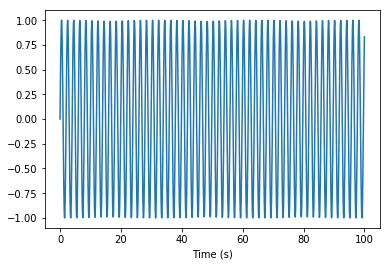

[ 0.          0.00999001  0.01998002 ... -0.02997003 -0.01998002
 -0.00999001]
We should be expecting a peak at 0.501560887659799 Hz


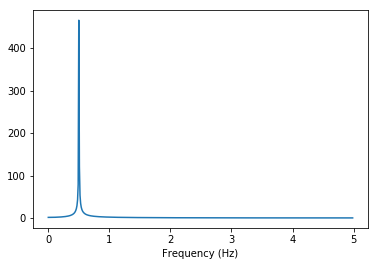

In [2]:
# Parameters that we might change (I like to keep these separate, to make it easier)
frequency = 3.1514 #rads/sec, frequency of our sinusoid
sampling_time = 100 #seconds, how long in time we will generate our sinusoid for.
timestep = 0.1 #seconds, the time in between each sample. (The inverse of this is our sample rate in Hz)

# Generate our timebase
num_samples = int(sampling_time/timestep) + 1  # Number of samples we will take
time_base = np.linspace(0, sampling_time, num_samples)
print("Time Base:")
print(time_base[0:5]) # Print out the first 5 items in the timebase just to check that it's what we expect

# Generate our sinusoid, and plot it!
x = np.sin(time_base*frequency)
plt.plot(time_base, x)
plt.xlabel('Time (s)')
plt.show()
# Generate the fourier transform of our sinusoid
X = sp.fftpack.fft(x)
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep) # Generates our frequency base
print(freq_base)

# Prepare to plot our fourier transform (effort!)
# Step 1 - take the absolute value of our fourier transform
X = np.abs(X)
# Step 2 - take only the second half of our fourier transform (it's mirrored about f = 0) 
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])
# Step 3 - plot the thing!
plt.figure()
plt.plot(freq_base, X)
plt.xlabel('Frequency (Hz)')

print("We should be expecting a peak at " + str(frequency/(2*np.pi)) + " Hz")

**Homework** 
Change the function! Find the fourier transform of the following functions: 
1) Gaussian
2) Step Function
3) Point Function

Try to add noise to the sinusoid! See how this noise shows up on the fourier transform!

## Part 2 - Russian Resolution 
Playing around with the resolution of f tranforms. Our goal; understand how the number of samples affects the resolution of our fourier transform. 


Time Base:
[0.  0.1 0.2 0.3 0.4]


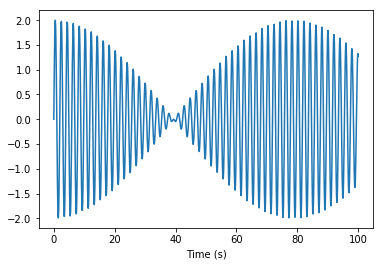

In [3]:
# Let's generate a compound sinusoid with the frequencies very close together, and try to resolve the difference.

# Parameters that we might change (I like to keep these separate, to make it easier)
frequency_1 = 3.1514 #rads/sec
frequency_2 = 3.2312 #rads/sec

sampling_time = 100 #seconds, how long in time we will generate our sinusoid for.
timestep = 0.1 #seconds, the time in between each sample. (The inverse of this is our sample rate in Hz)

# Generate our timebase
num_samples = int(sampling_time/timestep) + 1  # Number of samples we will take
time_base = np.linspace(0, sampling_time, num_samples)
print("Time Base:")
print(time_base[0:5]) # Print out the first 5 items in the timebase just to check that it's what we expect

# Generate our sinusoid, and plot it!
x = np.sin(time_base*frequency_1) + np.sin(time_base*frequency_2)
plt.plot(time_base, x)
plt.xlabel('Time (s)')
plt.show()

Note that we have a beat frequency on top of our two frequencies (what does THIS remind you of????)

[ 0.          0.00999001  0.01998002 ... -0.02997003 -0.01998002
 -0.00999001]


Text(0.5, 0, 'Frequency (Hz)')

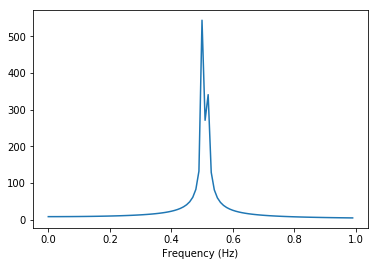

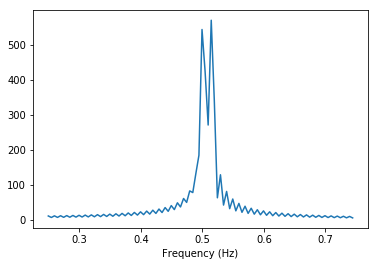

In [11]:
# Generate the fourier transform of our sinusoid
X = sp.fftpack.fft(x)
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep) # Generates our frequency base
print(freq_base)

# Prepare to plot our fourier transform (effort!)
# Step 1 - take the absolute value of our fourier transform
X = np.abs(X)

# Step 2 - take only the second half of our fourier transform (it's mirrored about f = 0) 
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])
# Step 3 - plot the thing!
plt.figure()
plt.plot(freq_base[0:100], X[0:100])
plt.xlabel('Frequency (Hz)')

# Zero pad our fourier boi
x_pad = np.pad(x, (0, num_samples), mode='constant', constant_values=0 )
freq_base = sp.fftpack.fftfreq(np.size(x_pad), d=timestep) # Generates our frequency base
X_PAD = sp.fftpack.fft(x_pad)

X_PAD = np.abs(X_PAD)

# Step 2 - take only the second half of our fourier transform (it's mirrored about f = 0) 
X_PAD = np.copy(X_PAD[:np.size(X_PAD)//2])
freq_base = np.copy(freq_base[:np.size(X_PAD)//2])
# Step 3 - plot the thing!
plt.figure()
plt.plot(freq_base[50:150], X_PAD[50:150])
plt.xlabel('Frequency (Hz)')

We now have two peaks - but we would like to improve their resolution a bit. 

**Homework** - Using what you learned in the tute, make changes to improve the resolution of these two frequencies. You may wish to plot only a subset of the fourier transfrom data (do this using a slice, eg plot(X[0:100]))

## Image Processing! 
In this section, you're going to try and remove the noise from an image using the fourier transform.


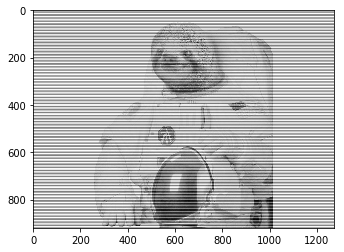

In [5]:
import imageio # Useful image processing stuff
import scipy.fftpack
from matplotlib import pyplot as plt

# Read in the image (this last part just extracts the greyscale intensity values - we aren't going to deal with color!)
Image = imageio.imread("SlothySinNoise.png")
plt.imshow(Image,cmap='gray')

C:\Users\z3372528\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


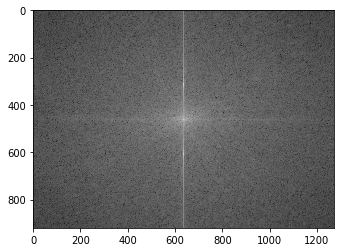

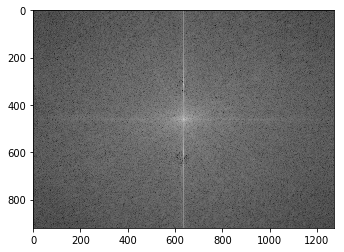

[[191.98525613 -7.00607653j 191.96501736 -7.0278403j
  191.94454004 -7.04809873j ... 192.04098278 -6.93510783j
  192.02354758 -6.95932732j 192.00487785 -6.98311818j]
 [240.20779881+20.39189781j 240.19009261+20.38744397j
  240.17199137+20.38337335j ... 240.2563989 +20.40614824j
  240.24114047+20.40141224j 240.2248824 +20.39660498j]
 [235.147165  +25.78332999j 235.14484344+25.80028707j
  235.14238885+25.81642795j ... 235.15388342+25.72938132j
  235.15164766+25.74768083j 235.1494174 +25.76573115j]
 ...
 [172.43217935 +7.1310664j  172.45957731 +7.14698779j
  172.48696708 +7.16043232j ... 172.35547963 +7.07117673j
  172.37961955 +7.09280594j 172.40534773 +7.11290015j]
 [220.34951332-20.00158987j 220.36863532-20.00430352j
  220.38781473-20.00822032j ... 220.29590618-20.00019119j
  220.31282437-19.99962888j 220.33079783-20.00005582j]
 [249.83969033-27.76912445j 249.8357653 -27.78949948j
  249.8318893 -27.80899179j ... 249.85055014-27.70504347j
  249.84717876-27.72664264j 249.84353133-27.74809

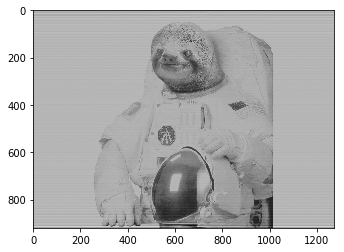

In [6]:
# Complete the 2D fourier transform of this image
fftRaw = scipy.fftpack.fft2(Image)
# Re-arrange the transform so that the centre is the 'low frequency' section
fftShifted = scipy.fftpack.fftshift(fftRaw)

# Take a look at the fourier transform (you have to take the log to see any useful contrast)
# We are also taking the absolute value because we are looking at the intensity! 
#      We don't want phase information (complex component of the FT)

plt.imshow(np.log(np.abs(fftShifted)), cmap='gray')
plt.show()

# INSERT PROCESSING HERE
#min_val = np.argmin(np.abs(fftShifted))
min_val = 0
for i in range(fftShifted.shape[0]):
    for j in range(fftShifted.shape[1]):
        if (((i > 300 and i < 350) or (i > 600 and i < 650)) and (j > 600 and j < 650)):
            fftShifted[i, j] = min_val + np.imag(fftShifted[i, j])
        #if (j > 600 and j < 650):
        #    fftShifted[i, j] = min_val + np.imag(fftShifted[i, j])

            
# Show our processing 
plt.imshow(np.log(np.abs(fftShifted)), cmap='gray')
plt.show()

# Reverse the FFT and generate our final image
image_out = scipy.fftpack.ifft2(scipy.fftpack.fftshift(fftShifted))
print(image_out)
plt.imshow(np.abs(image_out), cmap='gray')

## Your challenge is to do the processing of the fourier tranform! You will need to **exclude** certain regions of the fourier transform, and then transform the image back.

To get an idea of what to do, look at the fourier transforms of the three files - one has no noise, one has a bit of noise, and one has a lot of noise - what's the difference?